# Homework Assignment  6

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review.
Evaluate the classifier using the rest of the data (30pt).


In [1]:
import pandas as pd

df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In the provided dataset, there are categorical variables such as "UserId", "ProductId", and "Text" which contain textual information about the reviews. Additionally, the target variable "Score" represents the rating given to the product, ranging from 1 to 5 stars.

In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode UserId and ProductId columns
df['UserId_encoded'] = label_encoder.fit_transform(df['UserId'])
df['ProductId_encoded'] = label_encoder.fit_transform(df['ProductId'])
# Drop original UserId and ProductId columns
df.drop(['UserId', 'ProductId'], axis=1, inplace=True)

# Display encoded columns
df.head()

,Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,UserId_encoded,ProductId_encoded
0,1,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,188646,27619
1,2,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,25105,72383
2,3,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,210482,15267
3,4,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,152635,19718
4,5,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,57804,69007


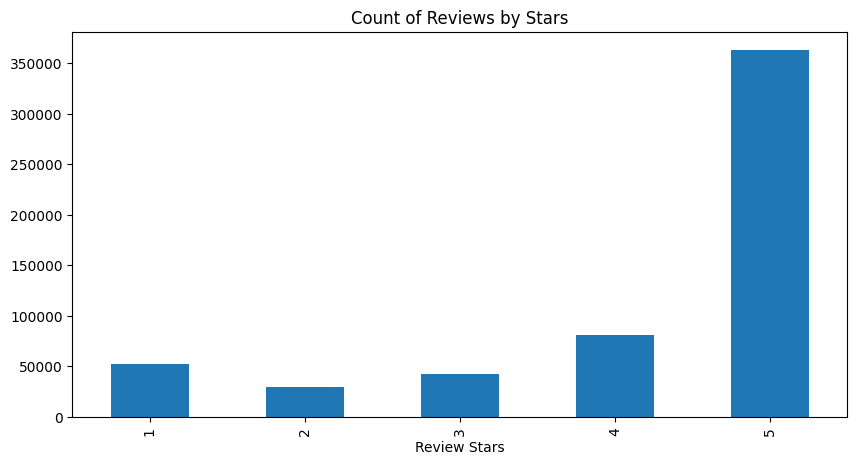

In [3]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

C:\Users\kazom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8193524553394728
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73     40789
           1       0.83      0.90      0.86     72902

    accuracy                           0.82    113691
   macro avg       0.81      0.79      0.80    113691
weighted avg       0.82      0.82      0.82    113691



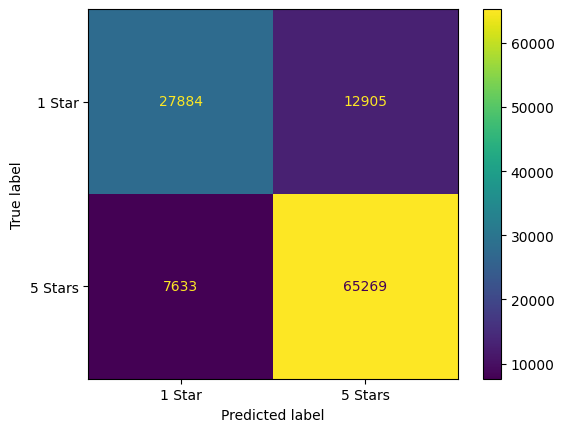

In [4]:
# Step 1: Preprocess the data
# Convert the Score column to binary labels
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x == 5 else 0)

# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Step 3: Extract features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train a classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vectorized, y_train)

# Step 5: Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1 Star', '5 Stars'])
disp.plot()
plt.show()

In [5]:
X_train_vectorized

<454763x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 12677006 stored elements in Compressed Sparse Row format>

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

Accuracy using TextBlob features: 0.6745
Accuracy using Afinn features: 0.6605


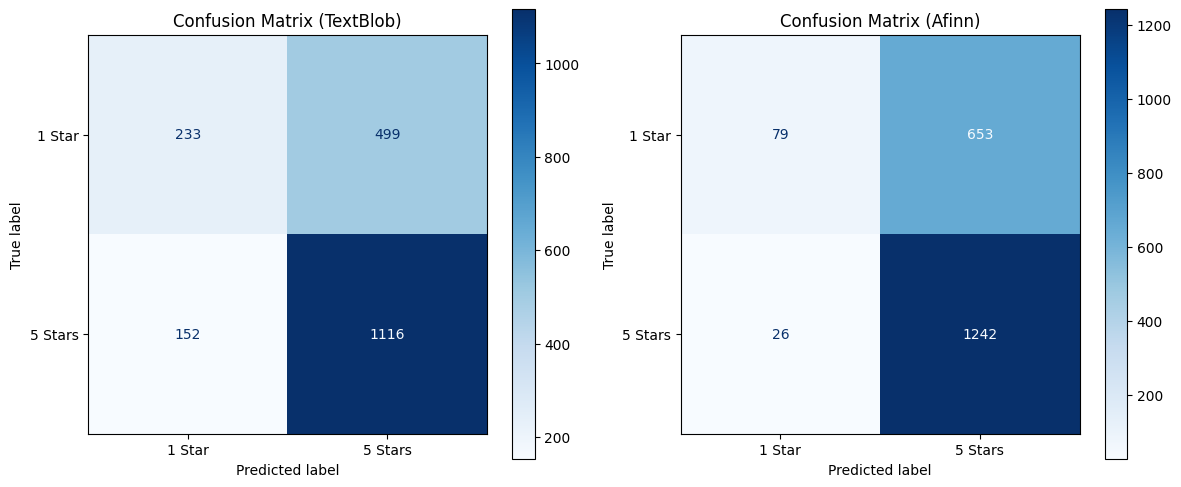

In [6]:
from textblob import TextBlob
from afinn import Afinn

# Extract sentiment scores using TextBlob and Afinn
X_train_textblob = X_train[:20000].apply(lambda x: TextBlob(x).sentiment.polarity)
X_test_textblob = X_test[:2000].apply(lambda x: TextBlob(x).sentiment.polarity)

X_train_afinn = X_train[:20000].apply(lambda x: Afinn().score(x))
X_test_afinn = X_test[:2000].apply(lambda x: Afinn().score(x))

# Train a logistic regression classifier using TextBlob features
classifier_textblob = LogisticRegression()
classifier_textblob.fit(X_train_textblob.values.reshape(-1, 1), y_train[:20000])
y_pred_textblob = classifier_textblob.predict(X_test_textblob.values.reshape(-1, 1))

# Train a logistic regression classifier using Afinn features
classifier_afinn = LogisticRegression()
classifier_afinn.fit(X_train_afinn.values.reshape(-1, 1), y_train[:20000])
y_pred_afinn = classifier_afinn.predict(X_test_afinn.values.reshape(-1, 1))

# Evaluate the classifiers
accuracy_textblob = accuracy_score(y_test[:2000], y_pred_textblob)
accuracy_afinn = accuracy_score(y_test[:2000], y_pred_afinn)

# Display the results
print("Accuracy using TextBlob features:", accuracy_textblob)
print("Accuracy using Afinn features:", accuracy_afinn)

# Generate confusion matrices
cm_textblob = confusion_matrix(y_test[:2000], y_pred_textblob)
cm_afinn = confusion_matrix(y_test[:2000], y_pred_afinn)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

disp_textblob = ConfusionMatrixDisplay(confusion_matrix=cm_textblob, display_labels=['1 Star', '5 Stars'])
disp_textblob.plot(ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix (TextBlob)')

disp_afinn = ConfusionMatrixDisplay(confusion_matrix=cm_afinn, display_labels=['1 Star', '5 Stars'])
disp_afinn.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Afinn)')

plt.tight_layout()
plt.show()

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [7]:
from tqdm import tqdm

In [8]:
import os

imdb_dir = 'aclImdb' # Data directory
train_dir = os.path.join(imdb_dir, 'train') # Get the path of the train set

# Setup empty lists to fill
labels = []
texts = []

# First go through the negatives, then through the positives
for label_type in ['neg', 'pos']:
    # Get the sub path
    dir_name = os.path.join(train_dir, label_type)
    print('loading ',label_type)
    # Loop over all files in path
    for fname in tqdm(os.listdir(dir_name)):

        # Only consider text files
        if fname[-4:] == '.txt':
            # Read the text file and put it in the list
            f = open(os.path.join(dir_name, fname))
            try: 
                texts.append(f.read())
                f.close()
            except:
                f.close()
            # Attach the corresponding label
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

loading  neg


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:17<00:00, 161.01it/s]


loading  pos


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:32<00:00, 385.13it/s]


In [9]:
len(labels), len(texts)

(25000, 24975)

In [10]:
np.mean(labels)

0.5

In [11]:
# Postivie Review
print('Label',labels[24002])
print(texts[24002])

Label 1
And I really mean that. I caught it last night on Vh1, and I was not expecting it to be so good. This is now one of my favorites. I must add that it has a killer soundtrack.


In [12]:
# Negative Review
print('Label',labels[1])
print(texts[1])

Label 0
Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son. The luxury jetliner takes off as planned but mid-air the plane is hi-jacked by the co-pilot Chambers (Robert Foxworth) & his two accomplice's Banker (Monte Markham) & Wilson (Michael Pataki) who knock the passengers & crew out with sleeping gas, they plan to steal the valuable cargo & land on a disused plane strip on an isolated island but while making his descent Chambers almost hits an oil rig in the Ocean & loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the Bermuda Triangle. With air in short supply, water leaking in & having flown over 200 miles off course the problems mou

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(texts) # Generate tokens by counting frequency
sequences = tokenizer.texts_to_sequences(texts) # Turn text into sequence of numbers

In [14]:
word_index = tokenizer.word_index
print('Token for "the"',word_index['the'])
print('Token for "Movie"',word_index['movie'])
print('Token for "generator"',word_index['generator'])

Token for "the" 1
Token for "Movie" 17
Token for "generator" 20359


In [15]:
# Display the first 10 words of the sequence tokenized
sequences[24002][:10]

[2, 10, 63, 379, 12, 10, 1055, 9, 233, 311]

In [16]:
from keras.preprocessing.sequence import pad_sequences

data = pad_sequences(sequences, maxlen=100)
print(data.shape) # We have 25K, 100 word sequences now

(24975, 100)


In [17]:
labels = np.asarray(labels)

# Shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 20000  # We will be training on 10K samples
validation_samples = 5000  # We will be validating on 10000 samples

# Split data
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the pipeline on training data
pipeline.fit(x_train, y_train)

# Predict on validation data
y_pred = pipeline.predict(x_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5328643216080402


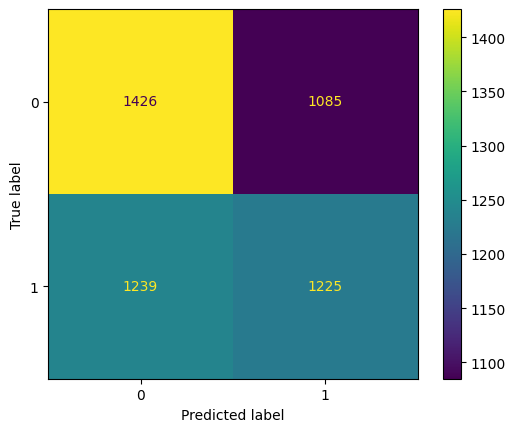

In [19]:
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [20]:
text = 'There is a really bad weather today, you should stay at home!'
seq_gen = tokenizer.texts_to_sequences([text])
print('raw seq:',seq_gen)
seq_gen = pad_sequences(seq_gen, maxlen=100)
print('padded seq:',seq_gen)
prediction = pipeline.predict(seq_gen)
print('positivity:',prediction)

raw seq: [[47, 6, 3, 63, 75, 5817, 638, 22, 141, 784, 30, 342]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   47    6    3   63   75 5817  638   22  141  784
    30  342]]
positivity: [0]


In [21]:
embeddings_index = {} # We create a dictionary of word -> embedding
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')

# In the dataset, each line represents a new word embedding
# The line starts with the word and the embedding values follow
for line in tqdm(f):
    values = line.split()
    word = values[0] # The first value is the word, the rest are the values of the embedding
    embedding = np.asarray(values[1:], dtype='float32') # Load embedding
    embeddings_index[word] = embedding # Add embedding to our embedding dictionary
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:13, 30380.31it/s]

Found 400000 word vectors.


In [22]:
# Create a matrix of all embeddings
all_embs = np.stack(embeddings_index.values())
emb_mean = all_embs.mean() # Calculate mean
emb_std = all_embs.std() # Calculate standard deviation
words = 10000
word_idx = tokenizer.word_index
embedding_dim = 100
nb_words = min(10000, len(word_idx))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_dim))
for word, i in word_idx.items():
    if i >= words: 
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

C:\Users\kazom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(words, embedding_dim, input_length=100, weights = [embedding_matrix], trainable = False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 320065 (1.22 MB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [25]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.6150 - acc: 0.6591 - val_loss: 0.5717 - val_acc: 0.7019
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4905 - acc: 0.7631 - val_loss: 0.5375 - val_acc: 0.7226
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4373 - acc: 0.7978 - val_loss: 0.5787 - val_acc: 0.7120
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3999 - acc: 0.8158 - val_loss: 0.6410 - val_acc: 0.6838
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3632 - acc: 0.8339 - val_loss: 0.5916 - val_acc: 0.7170
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3338 - acc: 0.8492 - val_loss: 0.6669 - val_acc: 0.7180
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3002 - acc: 0.8672 - val_loss: 0.6864 - val_acc: 0.7208
Epoch 8/10
625/625 [==============================] - 5s 7ms/step - loss: 0.

In [29]:
text = 'There is a really bad weather today, you should stay at home!'
seq_gen = tokenizer.texts_to_sequences([text])
print('raw seq:',seq_gen)
seq_gen = pad_sequences(seq_gen, maxlen=100)
print('padded seq:',seq_gen)
prediction = model.predict(seq_gen)
print('positivity:',prediction)

raw seq: [[47, 6, 3, 63, 75, 5817, 638, 22, 141, 784, 30, 342]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   47    6    3   63   75 5817  638   22  141  784
    30  342]]
1/1 [==============================] - 0s 120ms/step
positivity: [[0.04741407]]


In [32]:
text = 'Its a great day today, I feel like its my lucky day'
seq_gen = tokenizer.texts_to_sequences([text])
print('raw seq:',seq_gen)
seq_gen = pad_sequences(seq_gen, maxlen=100)
print('padded seq:',seq_gen)
prediction = model.predict(seq_gen)
print('positivity:',prediction)

raw seq: [[91, 3, 84, 248, 638, 10, 231, 37, 91, 58, 2040, 248]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   91    3   84  248  638   10  231   37   91   58
  2040  248]]
1/1 [==============================] - 0s 33ms/step
positivity: [[0.6912675]]


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to extract sentiment scores
def extract_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return [scores['neg'], scores['neu'], scores['pos'], scores['compound']]

# Additional features extraction
additional_features_train = np.array([extract_sentiment_scores(text) for text in texts[:training_samples]])
additional_features_val = np.array([extract_sentiment_scores(text) for text in texts[training_samples: training_samples + validation_samples]])

# Combine word embeddings with additional features
x_train_combined = np.concatenate((x_train, additional_features_train), axis=1)
x_val_combined = np.concatenate((x_val, additional_features_val), axis=1)

# Define preprocessing steps for text and additional features
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), slice(100, None))  # Scale additional features
    ])

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Create pipeline with preprocessing and RandomForestClassifier
pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV on training data
grid_search.fit(x_train_combined, y_train)

# Get the best estimator from GridSearchCV
best_pipeline = grid_search.best_estimator_

# Predict on validation data using the best estimator
y_pred = best_pipeline.predict(x_val_combined)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy with Additional Features:", accuracy)

Validation Accuracy with Additional Features: 0.49005025125628143


In [27]:
# Function to calculate the length of each review text
def calculate_text_length(text):
    return np.array([len(review) for review in text]).reshape(-1, 1)

# Additional features extraction for text length
additional_features_train_length = calculate_text_length(x_train)
additional_features_val_length = calculate_text_length(x_val)

# Combine word embeddings with additional features for text length
x_train_combined_length = np.concatenate((x_train, additional_features_train_length), axis=1)
x_val_combined_length = np.concatenate((x_val, additional_features_val_length), axis=1)

# Define preprocessing steps for text and additional features
preprocessor_length = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), slice(100, None))  # Scale additional features
    ])

# Create pipeline with preprocessing and RandomForestClassifier
pipeline_length = make_pipeline(preprocessor_length, RandomForestClassifier(random_state=42))

# Create GridSearchCV object
grid_search_length = GridSearchCV(pipeline_length, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV on training data
grid_search_length.fit(x_train_combined_length, y_train)

# Get the best estimator from GridSearchCV
best_pipeline_length = grid_search_length.best_estimator_

# Predict on validation data using the best estimator
y_pred_length = best_pipeline_length.predict(x_val_combined_length)

# Calculate accuracy
accuracy_length = accuracy_score(y_val, y_pred_length)
print("Validation Accuracy with Additional Features for Text Length:", accuracy_length)

Validation Accuracy with Additional Features for Text Length: 0.49527638190954776


In [28]:
# Function to check if each review contains the keywords
def contains_keyword(text_sequences, reverse_word_index, keywords):
    keyword_presence = []
    for sequence in text_sequences:
        # Convert sequence back to text
        text = ' '.join([reverse_word_index.get(i, '') for i in sequence])
        presence = [1 if keyword in text.lower() else 0 for keyword in keywords]
        keyword_presence.append(presence)
    return np.array(keyword_presence)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts) 
word_index = tokenizer.word_index

# Pad sequences to make them of equal length
data = pad_sequences(sequences, maxlen=100)

# Convert labels to numpy array
labels = np.asarray(labels)

# Shuffle data and split into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define keywords for feature extraction
keywords = ['great', 'worst', 'amazing', 'awful', 'excellent', 'terrible']

# Extract additional features for keyword presence
additional_features_train = contains_keyword(x_train, word_index, keywords)
additional_features_val = contains_keyword(x_val, word_index, keywords)

# Combine word embeddings with additional features
x_train_combined = np.concatenate((x_train, additional_features_train), axis=1)
x_val_combined = np.concatenate((x_val, additional_features_val), axis=1)

# Train RandomForestClassifier
pipeline = make_pipeline(RandomForestClassifier(n_estimators=100, random_state=42))
pipeline.fit(x_train_combined, y_train)

# Predict on validation data
y_pred = pipeline.predict(x_val_combined)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4992992992992993


The neural network using pre-trained word embeddings from a dictionary performed best.

We can see that all other methods are not better than the first one, and this could be due to several reasons:

1. Attention Mechanisms:

* Advantage of Attention Mechanisms: They dynamically focus on relevant parts of the input sequence, improving performance, especially with long or complex sequences.
* Disadvantage of Absence of Attention Mechanisms: Models without attention may have a fixed focus on all input parts, potentially leading to suboptimal performance.

2. Ensemble Methods:

* Advantage of Ensemble Methods: They combine multiple models' predictions, enhancing overall performance and robustness.
* Disadvantage of Single Models: Single models may suffer from overfitting or limited capacity to capture complex data distributions.